# Logistic Regression Classification with Images

Testing images

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from PIL import Image
from scipy import ndimage
%matplotlib inline

## Displaying sample cat and dog images from training set

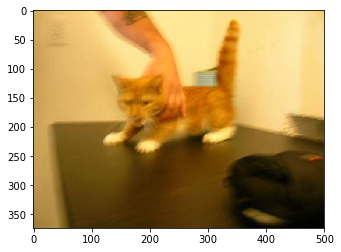

In [2]:
my_image = "train/cat.0.jpg"
image = np.array(sp.ndimage.imread(my_image, flatten=False))
plt.imshow(image)

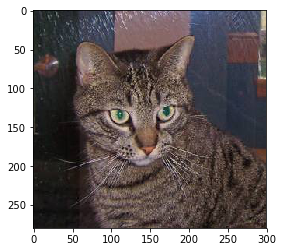

In [3]:
my_image = "train/cat.1.jpg"
image = np.array(sp.ndimage.imread(my_image, flatten=False))
plt.imshow(image)

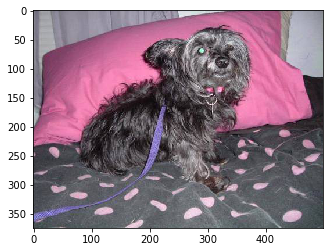

In [4]:
my_image = "train/dog.0.jpg"
image = np.array(sp.ndimage.imread(my_image, flatten=False))
plt.imshow(image)

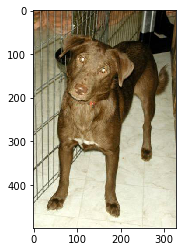

In [5]:
my_image = "train/dog.1.jpg"
image = np.array(sp.ndimage.imread(my_image, flatten=False))
plt.imshow(image)

## Creating training and test sets and changing image sizes

Creating the training set of cat and dog images. The label $y=1$ is for a dog and the label $y=0$ is for a cat.

In [6]:
num_train_cat_imgs = 100
cat_img_names = [ "train/cat." + str(i) + ".jpg" for i in range(num_train_cat_imgs) ]

num_train_dog_imgs = 100
dog_img_names = [ "train/dog." + str(i) + ".jpg" for i in range(num_train_dog_imgs) ]

train_set_x_orig = []

image_resize_dim = (64,64)

for cat_image in cat_img_names:
    
    # Reading in an image and creating it into an array
    image = np.array(sp.ndimage.imread(cat_image, flatten=False))
    
    # Resizing image to image_resize_dim dimensions
    image = sp.misc.imresize(image, image_resize_dim, interp='bilinear', mode=None)
    
    # Appending the image into the training set
    train_set_x_orig.append(image)
    

for dog_image in dog_img_names:
    
    # Reading in an image and creating it into an array
    image = np.array(sp.ndimage.imread(dog_image, flatten=False))
    
    # Resizing image to image_resize_dim dimensions
    image = sp.misc.imresize(image, image_resize_dim, interp='bilinear', mode=None)
    
    # Appending the image into the training set
    train_set_x_orig.append(image)
    
    
train_set_x_orig = np.array(train_set_x_orig)
train_set_x_orig.shape   
    

(200, 64, 64, 3)

In [7]:
train_set_y = np.append( np.zeros(num_train_cat_imgs), np.ones(num_train_dog_imgs) )
train_set_y = train_set_y.reshape( 1, num_train_cat_imgs + num_train_cat_imgs)
train_set_y.shape

(1, 200)

Creating the test set of cat and dog images

In [8]:
num_test_images = 50
test_img_names = [ "test/" + str(i) + ".jpg" for i in range(1,num_test_images+1,1) ]

test_set_x_orig = []

image_resize_dim = (64,64)

for test_image in test_img_names:
    
    # Reading in an image and creating it into an array
    image = np.array(sp.ndimage.imread(test_image, flatten=False))
    
    # Resizing image to image_resize_dim dimensions
    image = sp.misc.imresize(image, image_resize_dim, interp='bilinear', mode=None)
    
    # Appending the image into the training set
    test_set_x_orig.append(image)
    
    
test_set_x_orig = np.array(test_set_x_orig)
test_set_x_orig.shape 

(50, 64, 64, 3)

In [9]:
test_set_y = np.loadtxt("test_set_labels.txt", dtype="float")
test_set_y = test_set_y.reshape(1,len(test_set_y))
test_set_y.shape

(1, 50)

## Printing basic properties of training, test set, and image properties

In [10]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 200
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (200, 64, 64, 3)
train_set_y shape: (1, 200)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


## Flattening the images to a single array for data analysis

In [11]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 200)
train_set_y shape: (1, 200)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


## Standarizing the Dataset

In [12]:
train_set_x = train_set_x_flatten/255.0
test_set_x = test_set_x_flatten/255.0

<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

## Defining Functions for Logistic Regression algorithm

Writing down the dimmensions of the design matrix and the output values. Also, writing down the definition of the sigmoid function.

$$ \mbox{Design Matrix: } X \mbox{ , } ( n_{\mathrm{features}}, m_{\mathrm{train}} ) $$
$$ \mbox{Output: } y \mbox{ , } ( 1, m_{\mathrm{train}} ) $$

$$ \mbox{Sigmoid Function: }  \sigma(z) = \frac{ 1 }{ 1 + \mathrm{e}^{-z} } $$

In [13]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

Writing down the dimensions of the weights vector and the bias term.

$$ \mbox{Weights: } w \mbox{ , } ( n_{\mathrm{features}} , 1 ) $$
$$ \mbox{Bias: } b \mbox{ , } ( 1, 1 ) \mbox{ (scalar)} $$

This function initializes all the weights and bias to 0.0

In [14]:
def initialize_ws_and_bias(dim):
    
    weights = np.zeros((dim,1), dtype = float)
    bias = 0.0
    
    return weights, bias

Writing down the activation function, the loss function for one training example, and the cost function for all the training examples.

$$ \mbox{Activation Function Input: }  Z = w^{T} X + b  \mbox{ , } ( 1 , m_{\mathrm{train}} ) $$

$$ \mbox{Activation Function : }  A = \sigma(Z)  \mbox{ , } ( 1 , m_{\mathrm{train}} ) $$

$$ \mbox{Loss Function one Training Examples: } \mathcal{L} (\textbf{w},b) = - \frac{1}{m} \left( y^{i} \mathrm{log} (a^{i}) + (1-y^{i}) \mathrm{log} (1-a^{i}) \right) $$


$$ \mbox{Cost Function all Training examples: } J (\textbf{w},b) = \sum_{i=1}^{m} \mathcal{L} (\textbf{w},b) = - \frac{1}{m} \sum_{i=1}^{m} \left( y^{i} \mathrm{log} (a^{i}) + (1-y^{i}) \mathrm{log} (1-a^{i}) \right) $$

Writing down the update rules for the weights and the bias with gradient descent. In these equations, the parameter $\alpha$ is the learning rate. We also use the notation $ dw = \frac{\partial J}{\partial w} $ and 
$ db = \frac{\partial J}{\partial b}$ . 

$$ w := w - \alpha \frac{\partial J}{\partial w} = w - \alpha dw $$
$$ b := b - \alpha \frac{\partial J}{\partial b} = b - \alpha db $$

$$ \frac{\partial J}{\partial w_{i}} = \sum_{i=1}^{m} 
\frac{\partial \mathcal{L}}{\partial{a}} 
\frac{\partial \mathcal{a}}{\partial{z}} 
\frac{\partial \mathcal{z}}{\partial{w_{i}}} = \sum_{i=1}^{m}
\frac{1}{m} \frac{ a^{i} - y^{i} }{ a^{i}(1-a^{i}) } \times 
a^{i}(1-a^{i}) \times 
X_{i} = 
\frac{1}{m} \sum_{i=1}^{m} ( a^{i} - y^{i} ) X_{i}  $$


$$ \mbox{Vectorized: } \frac{\partial J}{\partial w} = X (A-Y)^{T}  \mbox{ , } ( n_{\mathrm{features}} , 1 ) $$

$$ \frac{\partial J}{\partial b} = \sum_{i=1}^{m} 
\frac{\partial \mathcal{L}}{\partial{a}} 
\frac{\partial \mathcal{a}}{\partial{z}} 
\frac{\partial \mathcal{z}}{\partial{b}} = \sum_{i=1}^{m}
\frac{1}{m} \frac{ a^{i} - y^{i} }{ a^{i}(1-a^{i}) } \times 
a^{i}(1-a^{i}) \times 
1 = 
\frac{1}{m} \sum_{i=1}^{m} ( a^{i} - y^{i} )  $$


$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} ( a^{i} - y^{i} )  \mbox{ , } ( 1, 1 ) \mbox{ (scalar)} $$

Defining a function which computes the derivate terms of the cost function, which are needed to update the parameters with gradient descent. 

In [15]:
def compute_grads_and_cost( w, b, X, Y ):
    
    m_train = X.shape[1]
    
    Z = np.dot( w.T, X ) + b
    A = sigmoid(Z)
    
    cost = -(1.0/m_train)*( np.sum( Y*np.log(A) + (1.0-Y)*np.log(1.0-A) ) )
    
    dw = (1.0/m_train)*np.dot( X, (A - Y).T )
    db = (1.0/m_train)*np.sum( A - Y )
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

This function performs gradient descent. It takes as input the data, the number of iterations, and the learning rate. It returns the bias and weights learned by gradient descent and an array with the value of the cost function after each iteration. Plotting the function allows us to see if gradient descent is converging to a minimum value of the cost function.

In [16]:
def grad_desc( X, Y, N_iter, learning_rate ):
    
    n_features = X.shape[0]
    
    w, b = initialize_ws_and_bias(n_features)
    
    J_each_iter = []
    
    for i in range(N_iter):
        
        grads, current_cost = compute_grads_and_cost( w, b, X, Y )
        
        J_each_iter.append(current_cost)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w += -learning_rate*dw
        b += -learning_rate*db
        
    final_params = {"weights": w, "bias": b }
    J_each_iter = np.array(J_each_iter, dtype=float)
        
    return final_params, J_each_iter 

Learning the weights and bias with gradient descent and plotting the cost function for several values of the learning rate to check the convergence of gradient descent.

/Users/rodolfosantana/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log
/Users/rodolfosantana/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in multiply


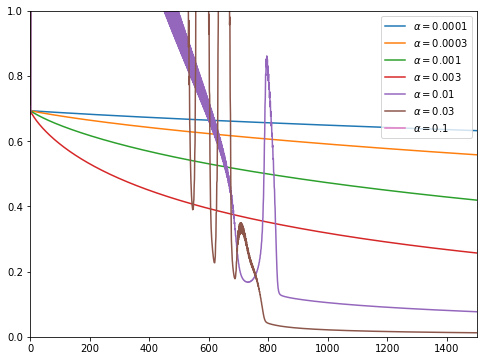

In [17]:

plt.figure(figsize=(8, 6))

learn_rate_vals = np.array([ 1.0e-4, 3.0e-4, 1.0e-3, 3.0e-3, 1.0e-2, 3.0e-2, 1.0e-1])

for i in range(len(learn_rate_vals)):
    learned_params, J_cost = grad_desc( X = train_set_x, Y = train_set_y, 
                                       N_iter = 1500, learning_rate = learn_rate_vals[i] )
    
    N_iterations = np.array(range(len(J_cost)))
    plt.plot(N_iterations,J_cost, label = r"$\alpha = $" + str(learn_rate_vals[i]))
    
    
plt.xlim((0.0,1500.0))
plt.ylim((0.0,1.0))
plt.legend(loc="upper right")

Choosing the best learning rate for the final model.

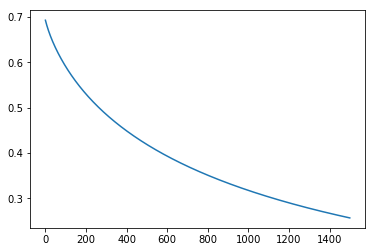

In [18]:
final_params, J_each_iter = grad_desc( X = train_set_x, Y = train_set_y, N_iter = 1500, learning_rate = 0.003 )
plt.plot( np.arange( 0, len(J_each_iter), 1 ), J_each_iter )

## Calculating Accuracy for training set and test set

This function computes the predecitions for each image based on the weights learned by logistic regression.

In [19]:
def predictions( w, b, X ):
    
    Z = np.dot( w.T, X ) + b
    A = sigmoid(Z)
    
    y_pred = np.where(A>0.5, 1.0, 0.0)
    
    return y_pred
    
    

Printing the accuraty for the training set.

In [20]:
y_pred_train = predictions( w = final_params["weights"], b = final_params["bias"], X = train_set_x )
print( "%.2f%%" %( 100.0*np.sum(y_pred_train == train_set_y)/train_set_y.shape[1] ) )

98.50%


Printing the accuraty for the test set.

In [21]:
y_pred_test = predictions( w = final_params["weights"], b = final_params["bias"], X = test_set_x )
print( "%.2f%%" %( 100.0*np.sum(y_pred_test == test_set_y)/test_set_y.shape[1] ) )

64.00%
